# Smart Waste Classifier for Germany’s Recycling System using Neural Networks

## Project Overview

This project uses a neural network to classify waste into 9 categories, including household waste, electronics, clothing, glass, plastics, paper, organic waste, batteries, and hazardous materials. The classifier helps users correctly identify the appropriate bin or disposal method for each item, making waste management easier, especially for foreigners. The goal is to promote proper recycling and sustainability in Germany through accurate waste sorting.

Dataset: It was created by downloading Google pictures using the "Download All Images" extension

## Project Owner: Manuel Contreras

### 1 - Libraries

#### Deep Learning

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping  

#### Image Processing

In [2]:
import cv2
import imghdr

C:\Users\manue\AppData\Local\Temp\ipykernel_15344\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


#### Numerical Computing

In [3]:
import numpy as np

#### Visualization

In [4]:
from matplotlib import pyplot as plt

#### File Handling

In [5]:
import os

### 2 - Setup

The purpose of the code below is to prevent Out-Of-Memory (OOM) errors by controlling how TensorFlow allocates memory on a GPU.

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')  # List all available GPUs available on the system that TensorFlow can access.
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)  # Set memory growth for each GPU

TensorFlow by default pre-allocates the entire GPU memory at once, which can lead to Out-Of-Memory (OOM) errors, especially if other processes are running on the GPU or the model doesn't require all the memory.
Setting memory_growth to True makes TensorFlow allocate memory gradually, starting small and increasing as needed during model training or inference. This helps to avoid using more GPU memory than necessary and prevents OOM errors.

In [7]:
tf.config.list_physical_devices('GPU')

[]

### 2 - Data Import and Data Preparation

In [8]:
data_dir = r'C:\Users\manue\Desktop\DataScience\data'

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

There were issues when trying to import the data because many pictures were corrupted. The purpose of this code is to validate and clean up the image dataset by checking if each image file is of an acceptable format and removing any invalid or corrupted images

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

The pictures below were corrupted, so I proceeded to eliminate them

In [11]:
import os

# List of image paths to delete
images_to_delete = [
    r"C:\Users\manue\Desktop\DataScience\data\Bio Waste (Brown Bin)\depositphotos_29706517-stock-photo-garden-work.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Bio Waste (Brown Bin)\garden_waste_1_image_and_text.png",
    r"C:\Users\manue\Desktop\DataScience\data\Brown Glass (Braunglas)\He483de9d448d4aea993c97550ea187e9B.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Brown Glass (Braunglas)\Hf13e27a22c934bd2bb4751ff199e759ed.png",
    r"C:\Users\manue\Desktop\DataScience\data\Clear Glass (Weißglas)\1055037_edit.png",
    r"C:\Users\manue\Desktop\DataScience\data\Clear Glass (Weißglas)\broken-glass-bottle-white-background-111914575.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Clear Glass (Weißglas)\H643365d9b12340398e38da9d6efa54b3M.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\0_GettyImages-1032296330 (1).jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\0_GettyImages-1032296330.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\0_GettyImages-825468874.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\computer-systems-standalone-mobile-nokia2.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\nokia_9000.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\phones.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Hazardous Waste (Sondermüll-Annahmestelle)\alba-group-Entsorgung-Privat-Schadstoffe.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Hazardous Waste (Sondermüll-Annahmestelle)\cfl-waste-recycling.gif",
    r"C:\Users\manue\Desktop\DataScience\data\Hazardous Waste (Sondermüll-Annahmestelle)\rocket-alkaline-c-batterie-2er-pack-fuer-blaster-und-spielze (1).jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Hazardous Waste (Sondermüll-Annahmestelle)\trash-sign-nhe-35379_ybstr_1000.gif",
    r"C:\Users\manue\Desktop\DataScience\data\Paper Waste (Blue Bin)\cajas-carton-vertedero.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Paper Waste (Blue Bin)\depositphotos_256983526-stock-photo-overflowing-rusty-metal-.jpg",
    r"C:\Users\manue\Desktop\DataScience\data\Recycable Packaging Waste (Yellow Bin)\types-of-plastic-bags-for-food-packaging.jpg"
]

# Loop through each image path and delete it
for image_path in images_to_delete:
    try:
        if os.path.exists(image_path):
            os.remove(image_path)
            print(f'Deleted: {image_path}')
        else:
            print(f'File not found: {image_path}')
    except Exception as e:
        print(f'Error deleting {image_path}: {e}')

File not found: C:\Users\manue\Desktop\DataScience\data\Bio Waste (Brown Bin)\depositphotos_29706517-stock-photo-garden-work.jpg
File not found: C:\Users\manue\Desktop\DataScience\data\Bio Waste (Brown Bin)\garden_waste_1_image_and_text.png
File not found: C:\Users\manue\Desktop\DataScience\data\Brown Glass (Braunglas)\He483de9d448d4aea993c97550ea187e9B.jpg
File not found: C:\Users\manue\Desktop\DataScience\data\Brown Glass (Braunglas)\Hf13e27a22c934bd2bb4751ff199e759ed.png
File not found: C:\Users\manue\Desktop\DataScience\data\Clear Glass (Weißglas)\1055037_edit.png
File not found: C:\Users\manue\Desktop\DataScience\data\Clear Glass (Weißglas)\broken-glass-bottle-white-background-111914575.jpg
File not found: C:\Users\manue\Desktop\DataScience\data\Clear Glass (Weißglas)\H643365d9b12340398e38da9d6efa54b3M.jpg
File not found: C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)\0_GettyImages-1032296330 (1).jpg
File not found: C:\Users\manue\Desktop\D

I will check if there are still pictures that are problematic

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Another problem arised because the downloaded pictures kept their original name, and many had characters that are Non-ASCII so I kept getting the UTF-8 error. The code below renames all the pictures by just enumerating them, so now they take names like 1,2,3,4 which are indeed ASCII characters.

In [13]:
import os

def sanitize_name(name):
    # Replace non-ASCII characters with underscores
    return ''.join(char if ord(char) < 128 else '_' for char in name)

def rename_images_in_folder(folder_path):
    # Sanitize folder name
    sanitized_folder_name = sanitize_name(os.path.basename(folder_path))
    sanitized_folder_path = os.path.join(os.path.dirname(folder_path), sanitized_folder_name)
    
    # Rename the folder if it has non-ASCII characters
    if sanitized_folder_path != folder_path:
        os.rename(folder_path, sanitized_folder_path)
        print(f"Renamed folder: {folder_path} to {sanitized_folder_path}")

    # list of all files in the folder
    files = os.listdir(sanitized_folder_path)
    
    # Filter out only image files
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
    image_files = [f for f in files if f.lower().endswith(image_extensions)]
    
    # Loop through the image files and rename them
    for index, filename in enumerate(image_files, start=1):
        # Sanitize the original filename
        sanitized_filename = sanitize_name(filename)
        
        # Construct new file name
        new_name = f"{index}.jpg"  
        old_file_path = os.path.join(sanitized_folder_path, sanitized_filename)
        new_file_path = os.path.join(sanitized_folder_path, new_name)
        
        # Check if the new file name already exists
        if os.path.exists(new_file_path):
            base_name, extension = os.path.splitext(new_name)
            counter = 1
            while os.path.exists(new_file_path):
                new_name = f"{base_name}_{counter}{extension}"
                new_file_path = os.path.join(sanitized_folder_path, new_name)
                counter += 1
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed: {sanitized_filename} to {new_name}")

def rename_images_in_all_folders(parent_folder_path):
    for folder_name in os.listdir(parent_folder_path):
        folder_path = os.path.join(parent_folder_path, folder_name)
        if os.path.isdir(folder_path):  
            print(f"Processing folder: {folder_path}")
            rename_images_in_folder(folder_path)


parent_folder_path = r'C:\Users\manue\Desktop\DataScience\data'  
rename_images_in_all_folders(parent_folder_path)

Processing folder: C:\Users\manue\Desktop\DataScience\data\Bio Waste (Brown Bin)
Renamed: 10.jpg to 1.jpg
Renamed: 100.jpg to 2.jpg
Renamed: 101.jpg to 3.jpg
Renamed: 102.jpg to 4.jpg
Renamed: 103.jpg to 5.jpg
Renamed: 104.jpg to 6.jpg
Renamed: 105.jpg to 7.jpg
Renamed: 106.jpg to 8.jpg
Renamed: 107.jpg to 9.jpg
Renamed: 108.jpg to 10.jpg
Renamed: 109.jpg to 11.jpg
Renamed: 110.jpg to 12.jpg
Renamed: 111.jpg to 13.jpg
Renamed: 112.jpg to 14.jpg
Renamed: 113.jpg to 15.jpg
Renamed: 114.jpg to 16.jpg
Renamed: 115.jpg to 17.jpg
Renamed: 116.jpg to 18.jpg
Renamed: 117.jpg to 19.jpg
Renamed: 118.jpg to 20.jpg
Renamed: 119.jpg to 21.jpg
Renamed: 11_1.jpg to 22.jpg
Renamed: 120.jpg to 23.jpg
Renamed: 121.jpg to 24.jpg
Renamed: 122.jpg to 25.jpg
Renamed: 123.jpg to 26.jpg
Renamed: 124.jpg to 27.jpg
Renamed: 125.jpg to 28.jpg
Renamed: 126.jpg to 29.jpg
Renamed: 127.jpg to 30.jpg
Renamed: 128.jpg to 31.jpg
Renamed: 129.jpg to 32.jpg
Renamed: 12_1.jpg to 33.jpg
Renamed: 130.jpg to 34.jpg
Renamed: 

The function tf.keras.utils.image_dataset_from_directory loads images from the specified directory and creates a tf.data.Dataset object. The images are organized into batches, and the dataset is designed to be efficient for training machine learning models.

In [24]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\manue\Desktop\DataScience\data')

Found 1556 files belonging to 9 classes.


The method as_numpy_iterator() converts the TensorFlow dataset into a NumPy iterator. This means that the data can now be accessed in a more Pythonic way using NumPy arrays, which might be easier for certain manipulations or analyses.

In [25]:
data_iterator = data.as_numpy_iterator()

The next() method retrieves the next batch of data from the iterator. In Python, iterators are used to traverse through a collection (in this case, the dataset).If the dataset is large, this allows to process the data in manageable chunks (batches) rather than loading the entire dataset into memory at once, which is crucial for efficiency and preventing memory overflow.

In [26]:
batch = data_iterator.next()

Found 1556 files belonging to 9 classes.


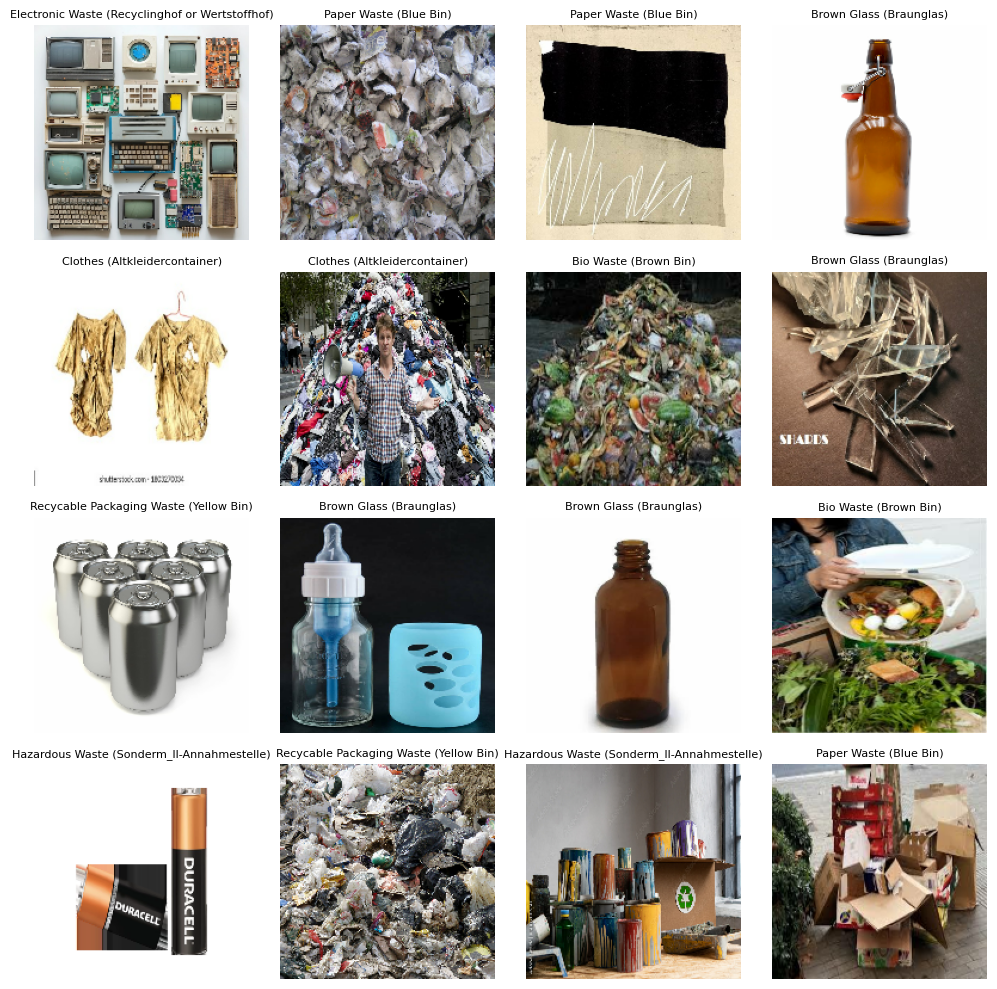

In [27]:
dataset_directory = r'C:\Users\manue\Desktop\DataScience\data'  
image_size = (180, 180)  # Resize images 
batch_size = 32

# Load images from directory
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
)

# images and labels
class_names = dataset.class_names
images, labels = next(iter(dataset.take(1)))  # Get a batch of images and labels

# Set up the plot
plt.figure(figsize=(10, 10))


num_images = 16  
for i in range(num_images):
    plt.subplot(4, 4, i + 1)  # 4x4 grid
    plt.imshow(images[i].numpy().astype("uint8"))  # Convert to uint8 for proper display
    plt.title(class_names[labels[i].numpy()], fontsize=8)  # Show the label with smaller font size
    plt.axis("off")  # Hide axis ticks

plt.tight_layout()
plt.show()

The pictues should be normalized to process neural networks

In [28]:
data = data.map(lambda x,y: (x/255, y))

In [29]:
data.as_numpy_iterator().next()

(array([[[[0.09222323, 0.06477224, 0.0569291 ],
          [0.08627451, 0.05882353, 0.05098039],
          [0.0906198 , 0.06316882, 0.05532568],
          ...,
          [0.03921569, 0.03137255, 0.03921569],
          [0.03921569, 0.03137255, 0.03921569],
          [0.03137255, 0.02352941, 0.03137255]],
 
         [[0.09520533, 0.06775435, 0.05991121],
          [0.08962929, 0.06217831, 0.05433517],
          [0.09168199, 0.06423101, 0.05638787],
          ...,
          [0.03921569, 0.03137255, 0.03921569],
          [0.03921569, 0.03137255, 0.03921569],
          [0.03137255, 0.02352941, 0.03137255]],
 
         [[0.09651747, 0.06906649, 0.06122335],
          [0.09186581, 0.06441483, 0.05657169],
          [0.09475031, 0.06729934, 0.0594562 ],
          ...,
          [0.03921569, 0.03137255, 0.03921569],
          [0.03921569, 0.03137255, 0.03921569],
          [0.03529412, 0.02745098, 0.03529412]],
 
         ...,
 
         [[0.25603032, 0.00897151, 0.04426563],
          [0.25903

Data Split

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 3 - Deep Learning Model

### 3.1 - First Model

In [53]:
model = Sequential()

In [54]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))  # Increased filters for deeper layers
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(9, activation='softmax'))  # Use softmax for multi-class classification

Padding='same' ensures that the output has the same width and height as the input by adding padding where necessary.

ReLU activation introduces non-linearity, helping the model learn complex patterns.

MaxPooling2D(): Reduces the spatial dimensions (width and height) of the feature maps by selecting the maximum value from 2x2 patches, effectively downsampling the data.

Flatten(): Converts the 2D feature maps into a 1D vector, preparing it for the fully connected layers.

Softmax activation outputs probabilities for each class, with the sum of probabilities equal to 1.

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,803,369 (64.10 MB)

 Trainable params: 16,803,369 (64.10 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [57]:
logdir='logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.1648 - loss: 2.5625 - val_accuracy: 0.2882 - val_loss: 2.0170
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3597 - loss: 1.8765 - val_accuracy: 0.3993 - val_loss: 1.7121
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4800 - loss: 1.5111 - val_accuracy: 0.4097 - val_loss: 1.6255
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6331 - loss: 1.1240 - val_accuracy: 0.5451 - val_loss: 1.3686
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7854 - loss: 0.7012 - val_accuracy: 0.5833 - val_loss: 1.2653
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.8834 - loss: 0.4205 - val_accuracy: 0.6632 - val_loss: 1.2396
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9258 - loss: 0.3011 - val_accuracy: 0.6389 - val_loss: 1.2292
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9644 - loss: 0.1794 - val_accuracy: 0.7083 - val_loss:

Result Analysis:

Accuracy: 
* Training accuracy improves significantly, starting from 15.72% in Epoch 1 and reaching 99.3% by Epoch 20. This suggests the model is learning and fitting the training data well.
* Validation accuracy also increases from 32.3% in Epoch 1, peaking at 80,2% in Epoch 20, , showing the model generalizes well on unseen data.

Loss: 
* Training loss consistently decreases, indicating that the model is learning well, starting at 2.75 and reducing to 0.018 by Epoch 20.
* Validation loss decreases overall, although there are some fluctuations (starting at 2.07, peaking around 1.5162, and ending at 1.34577). These fluctuations can indicate some overfitting in the middle epochs but suggest eventual improvement.

Conclusion:
The model is good, but it tends to overtif due to the gap between training and validation accuracy. Validation loss also increases from Epoch 0 onwards, which also indicates overfitting.

What to do?

Early Stopping
Regularization such as dropout or weight decay or get more data

Plot Performance

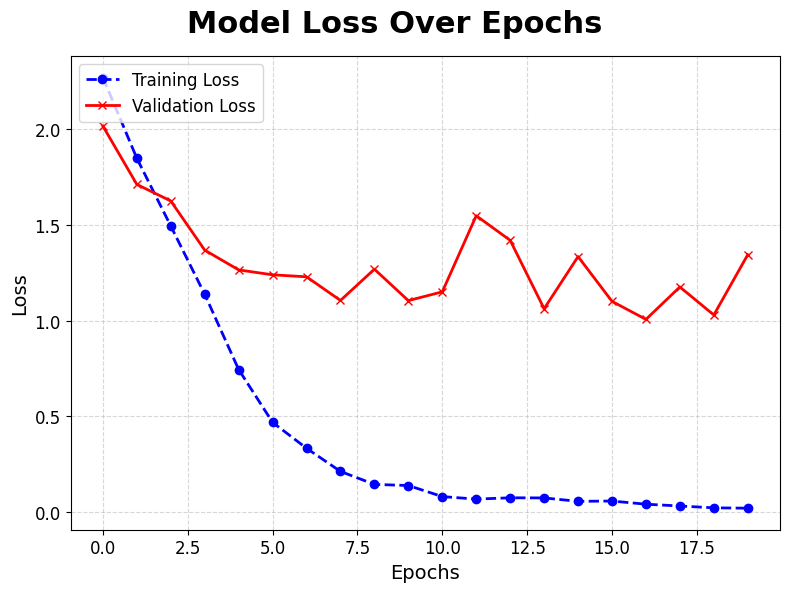

In [64]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hist.history['loss'], color='blue', label='Training Loss', linestyle='--', marker='o', linewidth=2)
ax.plot(hist.history['val_loss'], color='red', label='Validation Loss', linestyle='-', marker='x', linewidth=2)

# titles and labels 
fig.suptitle('Model Loss Over Epochs', fontsize=22, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

# ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# legend 
ax.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

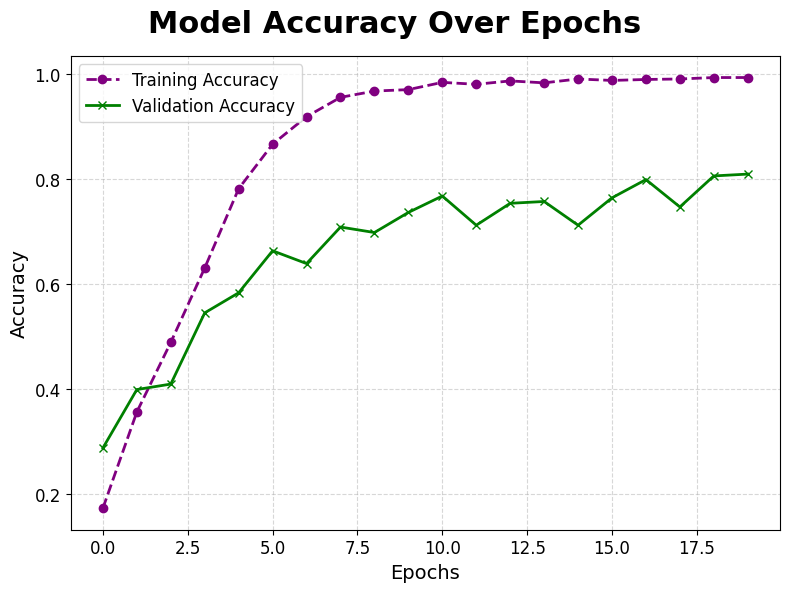

In [65]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hist.history['accuracy'], color='purple', label='Training Accuracy', linestyle='--', marker='o', linewidth=2)
ax.plot(hist.history['val_accuracy'], color='green', label='Validation Accuracy', linestyle='-', marker='x', linewidth=2)

# titles and labels 
fig.suptitle('Model Accuracy Over Epochs', fontsize=22, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# legend with larger font size
ax.legend(loc='upper left', fontsize=12)


plt.tight_layout()
plt.show()

### Model Evaluation and Testing

In [81]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [82]:
for batch in test.as_numpy_iterator(): 
    x, y = batch
    yhat = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


In [83]:
yhat_classes = tf.argmax(yhat, axis=-1) 

In [84]:
pre.update_state(y, yhat_classes)
re.update_state(y, yhat_classes)
acc.update_state(y, yhat_classes)

In [85]:
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")

Precision: 0.9667
Recall: 1.0000
Accuracy: 0.7812


The high precision indicates that the model is very precise in predicting certain categories, meaning that when it predicts a class, it's correct. 

The model is also performing well in capturing almost all instances of the correct class, indicating that it’s rarely missing relevant examples.

The Accuracy is not as high as the precision and recall, which indicates that the model might be struggling with other categories. Some classes could be harder to differentiate from others.

One reason of this could be that some categories are underrepresented, which could be solved by getting more data or oversampling.

In [86]:
import random

# Path (the class should be 0)

folder_path = r'C:\Users\manue\Desktop\DataScience\data\Bio Waste (Brown Bin)'

# List of image filenames
image_numbers = list(range(1, 214))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Image 105: Predicted class is 0 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image 11: Predicted class is 0 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 14: Predicted class is 0 with a probability of 0.9995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image 10: Predicted class is 6 with a probability of 0.6386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 166: Predicted class is 0 with a probability of 0.9993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 61: Predicted class is 6 with a probability of 0.9097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 96: Predicted class is 0 with a probability of 0.9997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 25: Predicted class is 0 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 184: Predicted class is 0 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 149: Predicted class is 0 with a probability of 1.0000
1/1 ━━━━━━━━━━━

In [87]:
# Path (the class should be 1)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Brown Glass (Braunglas)'

# List of image filenames
image_numbers = list(range(1, 148))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 110: Predicted class is 1 with a probability of 0.5291
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Image 90: Predicted class is 1 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 118: Predicted class is 1 with a probability of 0.9987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 44: Predicted class is 1 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 59: Predicted class is 1 with a probability of 0.9985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 135: Predicted class is 1 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 43: Predicted class is 1 with a probability of 0.9993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 126: Predicted class is 1 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image 74: Predicted class is 1 with a probability of 0.9989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 133: Predicted class is 1 with a probability of 0.9925
1/1 ━━━━━━━━━━

In [88]:
# Path (the class should be 2)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Clear Glass (Wei_glas)'

# List of image filenames
image_numbers = list(range(1, 154))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Image 148: Predicted class is 2 with a probability of 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 2: Predicted class is 2 with a probability of 0.9933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 55: Predicted class is 2 with a probability of 0.9994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 23: Predicted class is 2 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 65: Predicted class is 2 with a probability of 0.9998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 63: Predicted class is 2 with a probability of 0.9879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 62: Predicted class is 2 with a probability of 0.9923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 143: Predicted class is 2 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 44: Predicted class is 2 with a probability of 0.9838
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 21: Predicted class is 2 with a probability of 0.9984
1/1 ━━━━━━━━━━━━━━

In [89]:
# Path (the class should be 3)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Clothes (Altkleidercontainer)'

# List of image filenames
image_numbers = list(range(1, 171))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Image 118: Predicted class is 3 with a probability of 0.9798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Image 149: Predicted class is 3 with a probability of 0.9531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 150: Predicted class is 7 with a probability of 0.3283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 9: Predicted class is 0 with a probability of 0.9132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 137: Predicted class is 6 with a probability of 0.9124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 96: Predicted class is 3 with a probability of 0.9987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Image 15: Predicted class is 3 with a probability of 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 17: Predicted class is 3 with a probability of 0.8573
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 86: Predicted class is 3 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Image 3: Predicted class is 6 with a probability of 0.5372
1/1 ━━━━━━━━━━━━

In [90]:
# Path (the class should be 4)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Electronic Waste (Recyclinghof or Wertstoffhof)'

# List of image filenames
image_numbers = list(range(1, 204))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Image 136: Predicted class is 4 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image 165: Predicted class is 4 with a probability of 0.9996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Image 7: Predicted class is 4 with a probability of 0.9727
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image 71: Predicted class is 2 with a probability of 0.7932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image 65: Predicted class is 4 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image 167: Predicted class is 4 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image 156: Predicted class is 4 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image 93: Predicted class is 4 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image 40: Predicted class is 4 with a probability of 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image 178: Predicted class is 4 with a probability of 1.0000
1/1 ━━━━━━━━━━━━

In [93]:
# Path (the class should be 6)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Hazardous Waste (Sonderm_ll-Annahmestelle)'

# List of image filenames
image_numbers = list(range(1, 221))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Image 157: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Image 198: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 2: Predicted class is 8 with a probability of 0.6527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 114: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 44: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 163: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 205: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image 52: Predicted class is 0 with a probability of 0.8135
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 25: Predicted class is 6 with a probability of 0.9991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 51: Predicted class is 6 with a probability of 1.0000
1/1 ━━━━━━━━━━━

In [94]:
# Path (the class should be 7)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Paper Waste (Blue Bin)'

# List of image filenames
image_numbers = list(range(1, 144))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Image 102: Predicted class is 7 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Image 83: Predicted class is 7 with a probability of 0.9990
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image 45: Predicted class is 7 with a probability of 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image 118: Predicted class is 1 with a probability of 0.7765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image 126: Predicted class is 0 with a probability of 0.4653
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image 29: Predicted class is 7 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 26: Predicted class is 7 with a probability of 0.9968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image 36: Predicted class is 8 with a probability of 0.9346
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image 2: Predicted class is 7 with a probability of 0.9996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image 50: Predicted class is 7 with a probability of 0.9803
1/1 ━━━━━━━━━━━━━

In [95]:
# Path (the class should be 8)
folder_path = r'C:\Users\manue\Desktop\DataScience\data\Recycable Packaging Waste (Yellow Bin)'

# List of image filenames
image_numbers = list(range(1, 197))  

# Random selection
random_images = random.sample(image_numbers, 20)

# Iterate through the images
for num in random_images:
    # File path construction
    image_path = os.path.join(folder_path, f'{num}.jpg')  

    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue  # Skip to the next image if the file doesn't exist

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Error loading image: {image_path}")
        continue

    # Convert the image from BGR (OpenCV default) to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the required input size (256x256)
    resize = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image and make a prediction
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Highlight the class with the highest value
    max_class_index = np.argmax(yhat)  # Get the index of the class with the highest predicted value
    print(f"Image {num}: Predicted class is {max_class_index} with a probability of {yhat[0][max_class_index]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image 165: Predicted class is 8 with a probability of 0.9989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Image 50: Predicted class is 8 with a probability of 0.9713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Image 73: Predicted class is 8 with a probability of 0.9668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image 60: Predicted class is 8 with a probability of 0.9904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 179: Predicted class is 8 with a probability of 0.9987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image 92: Predicted class is 8 with a probability of 0.9711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image 25: Predicted class is 8 with a probability of 0.9982
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image 85: Predicted class is 2 with a probability of 0.9998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image 191: Predicted class is 8 with a probability of 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Image 86: Predicted class is 3 with a probability of 0.7683
1/1 ━━━━━━━━━━━

The accuracy was (160-23)/100 = 85,6% 

### 3.2 - Second Model

Since the previous model tend to overfit, it was decided to implement this next one with regularization techniques.
These techniques are:

* L2 Regularization (Ridge Regularization) which adds a penalty proportional to the square of the weights' values to the loss function, discouraging large weights and helping reduce model complexity.
* Batch Normalization that normalizes the inputs to each layer, stabilizing training and acting as a form of regularization by reducing internal covariate shifts. It helps improve convergence and allows the model to use higher learning rates, thereby reducing overfitting.
* Drouput : Randomly drops neurons to prevent overfitting.

In [47]:
# Build the model
model = Sequential()

# First convolutional block
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3),
                 kernel_regularizer=regularizers.l2(0.001)))  # L2 Regularization
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D())

# Second convolutional block
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))  # L2 Regularization
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D())

# Third convolutional block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))  # L2 Regularization
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D())

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # L2 Regularization
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(9, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model (assuming 'train_data' and 'train_labels' are your training dataset)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.1760 - loss: 32.9257 - val_accuracy: 0.1215 - val_loss: 31.3629
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.2457 - loss: 5.2814 - val_accuracy: 0.0799 - val_loss: 57.7465
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.1887 - loss: 3.4650 - val_accuracy: 0.0972 - val_loss: 63.7016
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2325 - loss: 3.3400 - val_accuracy: 0.0799 - val_loss: 39.5450
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.2376 - loss: 3.2418 - val_accuracy: 0.1007 - val_loss: 26.5675
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.2066 - loss: 3.2733 - val_accuracy: 0.1944 - val_loss: 13.8219
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.2416 - loss: 3.1557 - val_accuracy: 0.2222 - val_loss: 6.5912
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.2411 - loss: 3.2048 - val_accuracy: 0.2396

This model is bad, since neither the training data, nor the validation data is learned correctly by it. (This can be seen by the really low accuracy)

### Model Selection

The initial model demonstrated strong performance, achieving a **precision** of **0.9667**, a **recall** of **1.0000**, and an **accuracy** of **0.7812**. Testing the model further confirmed its effectiveness, yielding an accuracy of approximately 85,6%